In [ ]:
#hand writing digits recogntion using convnet


"""
When 99.8% accuracy has been hit, print out the string "Reached 99.8% accuracy so cancelling training!"
**Things to Note:**
1. When coding the `class myCallback`, Python 3 will run into an error
```python
TypeError: '>' not supported between instances of 'NoneType' and 'float'
```
when using the code
```python
if(logs.get('accuracy')>0.99):
```
For Python 3, use the following equivalent code line
```python
if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
```
2. You can run the notebook using TensorFlow 2.5.0
"""

#!pip install tensorflow==2.5.0

import tensorflow as tf

print(tf.__version__)

# mnist = tf.keras.datasets.mnist
# (_,_), (test_images, test_labels) = mnist.load_data()
# test_images = test_images/255.0
# test_images.shape


def train_mnist_conv():
    
    
    class mycallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('accuracy') is not None and logs.get('accuracy')>0.998):
          print('\nReach 99.8% accuracy!, so canceling training')
          self.model.stop_training = True
    
    

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
   
    
    training_images = training_images/255.0
    test_images = test_images/255.0

    
    global model
    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)),
            tf.keras.layers.MaxPooling2D((2,2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation = 'relu'),
            tf.keras.layers.Dense(10, activation = 'softmax'),
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    callbacks = mycallback()
    
    history = model.fit(training_images,training_labels, epochs=20, callbacks = [callbacks])    
    #print(model.evaluate(test_images, test_labels))
    return history.epoch, history.history['accuracy'][-1], model



In [ ]:
epochs, accuracy, model= train_mnist_conv()



Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1358 - accuracy: 0.9588
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0483 - accuracy: 0.9851
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - accuracy: 0.9939
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0128 - accuracy: 0.9961
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - accuracy: 0.9970
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0080 - accuracy: 0.9975
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0061 - accuracy: 0.9978
Epoch 9/20
1870/1875 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984
Reach 99.8% accuracy!, so canceling training
1875/1875 [==============================

In [13]:
type(epochs)
accuracy

0.9857000112533569

In [9]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10816)             0         
                                                                 
 dense_6 (Dense)             (None, 120)               1298040   
                                                                 
 dense_7 (Dense)             (None, 10)                1210      
                                                                 
Total params: 1,299,890
Trainable params: 1,299,890
Non-trainable params: 0
____________________________________________

313/313 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9857
test accuracy: 0.9857000112533569
image label: 4


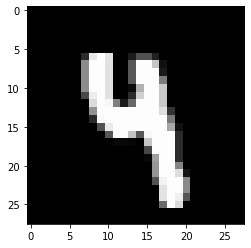

In [20]:
loss, accuracy = model.evaluate(test_images, test_labels)
import numpy as np
index = np.random.randint(1000)
print('test accuracy: {}'.format(accuracy))

import matplotlib.pyplot as plt
plt.imshow(test_images[index], cmap = 'gray')
print(f'image label: {test_labels[index]}')